# Problem Statement

Given the dataset which captures gross salary of the employees and by training with such data we want to predict salary of the employees in the test data.

# 1: Prepare data
## i: Import
Lets start with importing libraries we will be using and the getting the dataset into our machine.

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [40]:
salary=pd.read_csv('/content/train_salary.csv')

Now we have our data into our machine. Lets have a high level overview of the set.

In [41]:
salary.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [42]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [43]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


Since we are trying to predict Salary, both Annual Salary and Gross Pay are eligible candidates for target variable. But Gross Pay has more number of null values so we will drop it and then drop other null data.

In [46]:
salary.drop(columns='GrossPay',inplace=True)

Notice that Annual Salary should be float but currently it is object datatype. We can see there is $ sign at the first, so we fix the issue.

In [47]:
salary['AnnualSalary']=salary['AnnualSalary'].apply(lambda x: float(str(x)[1:]))

In [48]:
salary.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0


In [49]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0    Name         18981 non-null  object 
 1   JobTitle      18981 non-null  object 
 2   AgencyID      18981 non-null  object 
 3   Agency        18981 non-null  object 
 4   HireDate      18911 non-null  object 
 5   AnnualSalary  18981 non-null  float64
dtypes: float64(1), object(5)
memory usage: 889.9+ KB


In [51]:
salary.isnull().sum()

 Name            0
JobTitle         0
AgencyID         0
Agency           0
HireDate        70
AnnualSalary     0
dtype: int64

Hire Date has some missing data. We can drop the column as the missing data is not very significant compared to total dataset.

In [52]:
salary.dropna(inplace=True)

In [53]:
salary.isnull().sum()

 Name           0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

## ii: Explore
Now we will explore our data to see if we can find some insights.

Find some value counts for catogorical data.

(1) Agency

Text(0, 0.5, 'Number of employees')

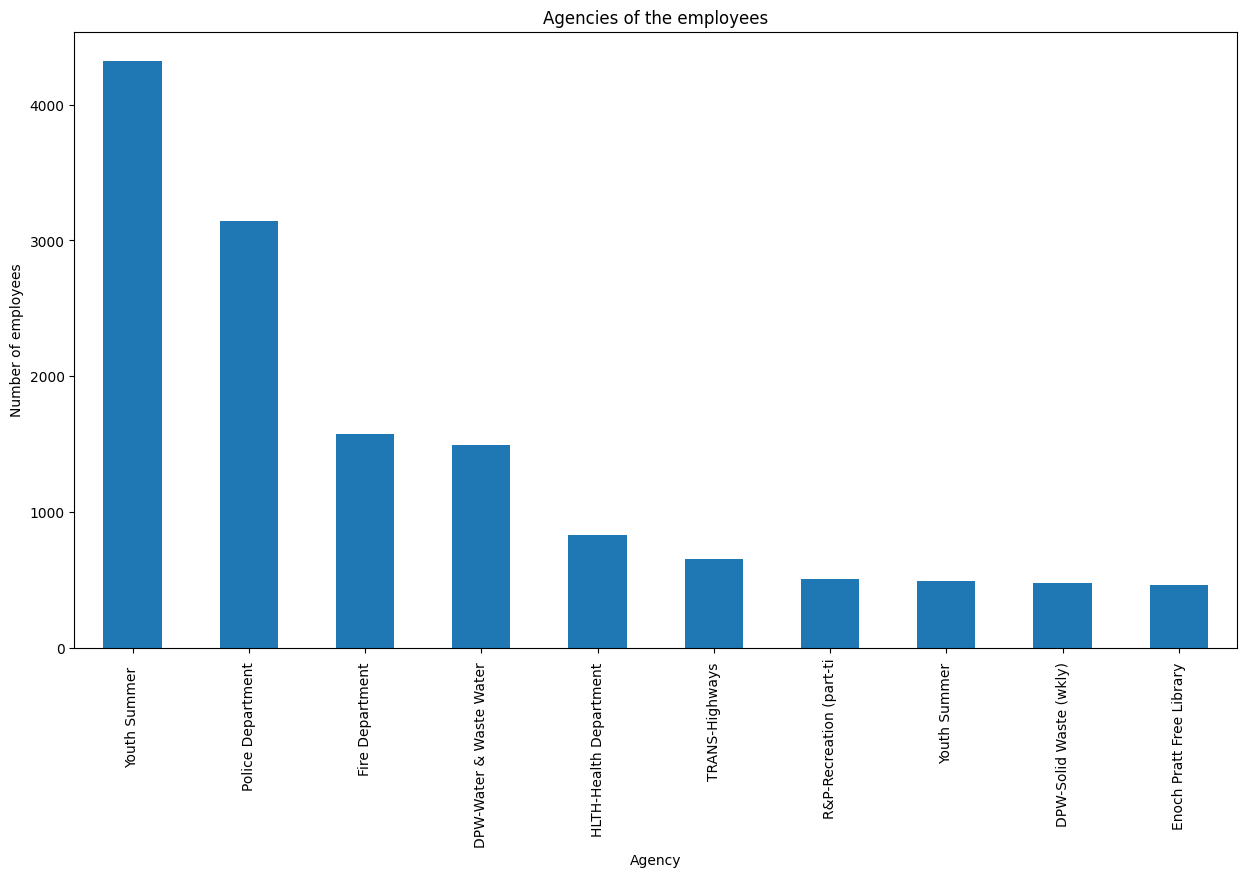

In [54]:
plt.figure(figsize=(15,8))

salary['Agency'].value_counts().iloc[:10].plot(kind='bar')
plt.title("Agencies of the employees")
plt.xlabel("Agency")
plt.ylabel("Number of employees")

(ii) Job Title

Text(0, 0.5, 'Number of employees')

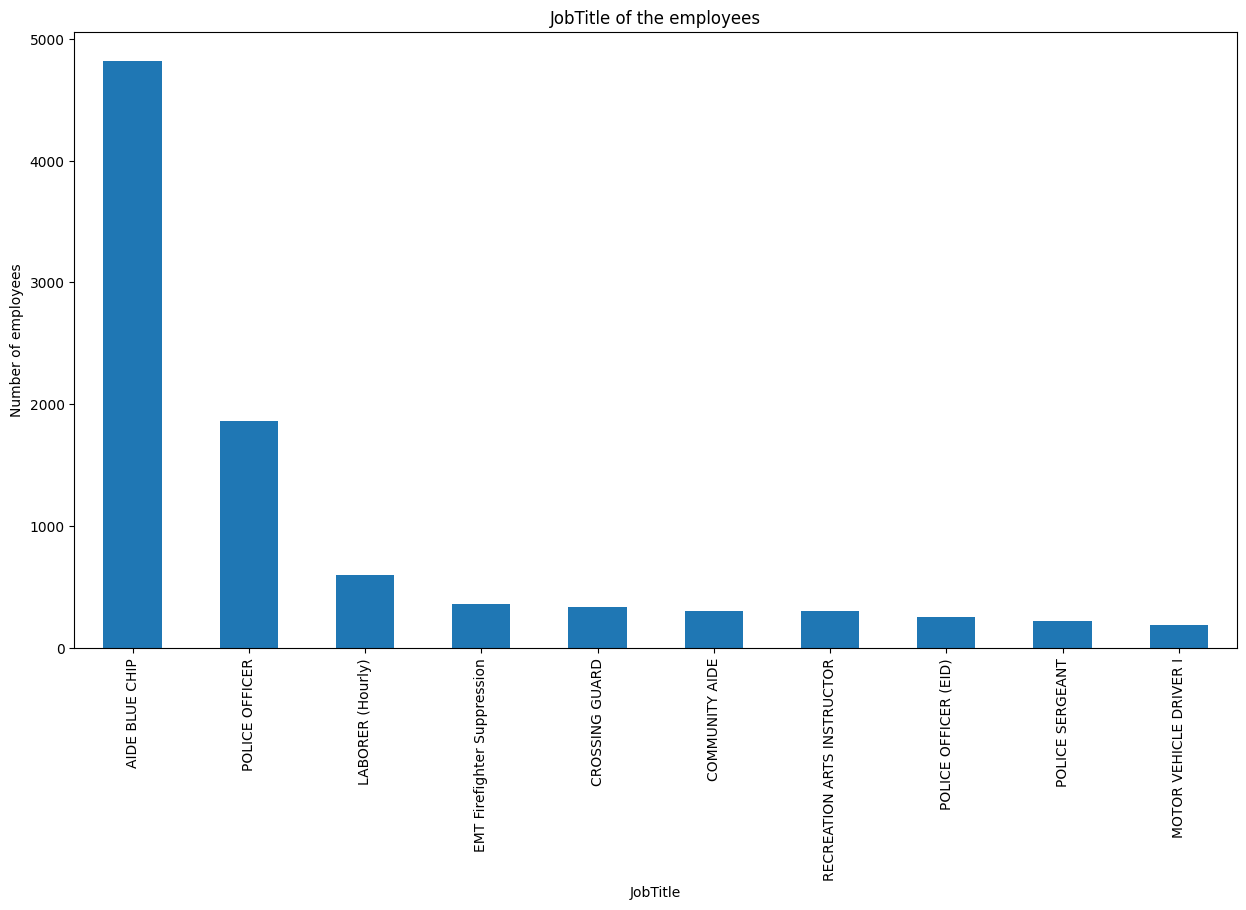

In [55]:
plt.figure(figsize=(15,8))

salary['JobTitle'].value_counts().iloc[:10].plot(kind='bar')
plt.title("JobTitle of the employees")
plt.xlabel("JobTitle")
plt.ylabel("Number of employees")

Plotting the density plot to see for outliers.

Text(0.5, 1.0, 'Annual Salary Distribution Plot')

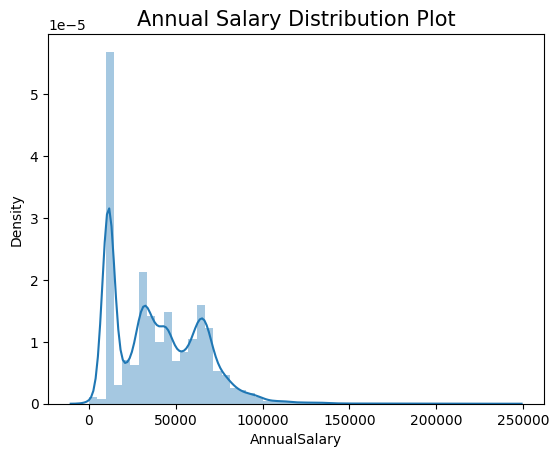

In [56]:
sns.distplot(salary.AnnualSalary)
plt.title('Annual Salary Distribution Plot', fontsize=15)

<Axes: >

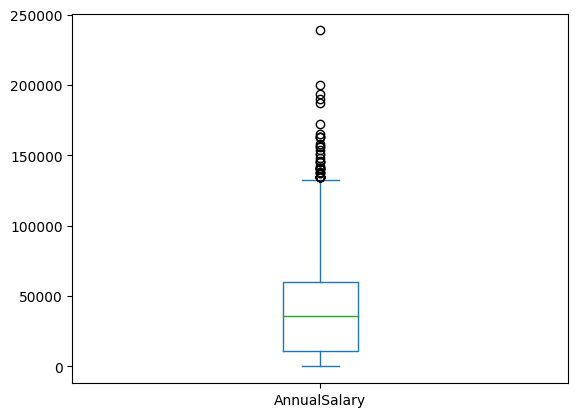

In [57]:
salary.AnnualSalary.plot.box()

From above two graphs we can say that the salary above 140000 seems to be outlier. We are including some outliers as 3 simga is near to 120000, but those are very near to the border.

In [58]:
salary = salary[salary['AnnualSalary']<140000]

<Axes: >

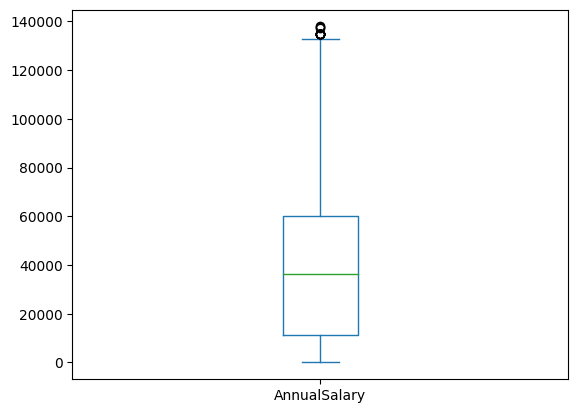

In [59]:
salary.AnnualSalary.plot.box()

So now we have removed the outliers of the data.


### Make Hire Date column some useful

In [60]:
salary['HireDay'] = salary['HireDate'].apply(lambda x: int(str(x[3:5])))
salary['HireMonth'] = salary['HireDate'].apply(lambda x: int(str(x[0:2])))
salary['HireYear'] = salary['HireDate'].apply(lambda x: int(str(x[6:])))

In [61]:
salary.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013


In [62]:
month_hiring=salary.groupby(['HireMonth']).agg({'AnnualSalary':'mean',"JobTitle":'count'})

In [63]:
month_hiring

,AnnualSalary,JobTitle
HireMonth,,
1,50544.885995,1171
2,51862.053571,952
3,51025.202216,1083
4,48492.981601,1012
5,24679.977200,2889
6,21459.616047,4498
7,47052.503454,1303
8,52472.517027,1268
9,49304.784586,1221


<Axes: xlabel='HireMonth'>

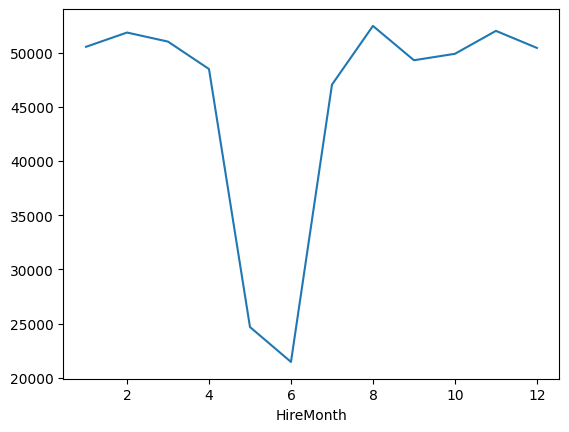

In [66]:
month_hiring['AnnualSalary'].plot(kind='line')

<Axes: xlabel='HireMonth'>

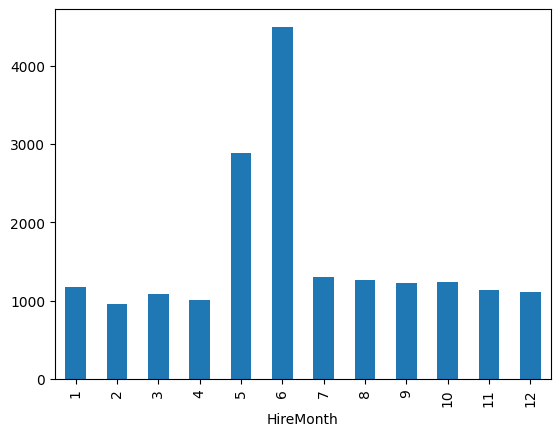

In [67]:
month_hiring['JobTitle'].plot(kind='bar')

We can see that there is more hiring in the month of May and June, but the mean salary of the employees hired on those months are lesser than the others.- An surprising Observation!!!

In [68]:
year_hiring=salary.groupby(['HireYear']).agg({'AnnualSalary':'mean',"JobTitle":'count'})

In [69]:
year_hiring

,AnnualSalary,JobTitle
HireYear,,
1952,55891.000000,1
1961,58313.000000,1
1962,38195.000000,1
1963,58313.000000,1
1965,52272.400000,5
1966,55948.000000,4
1967,42275.833333,6
1968,42614.125000,8
1969,54054.142857,21


Its quite lot of data to be plot on a bar graph so lets plot it as a line graph to see trend as time goes on.

<Axes: xlabel='HireYear'>

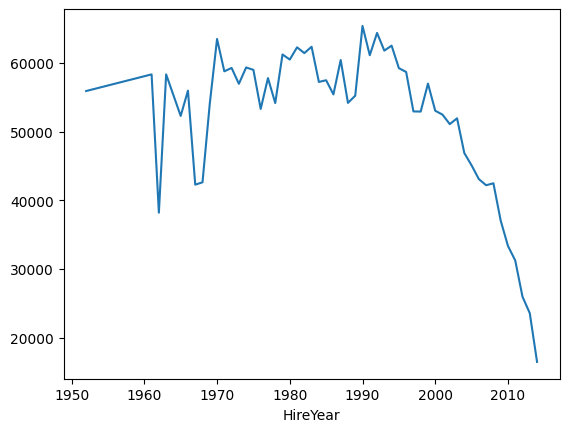

In [70]:
year_hiring['AnnualSalary'].plot(kind='line')


<Axes: xlabel='HireYear'>

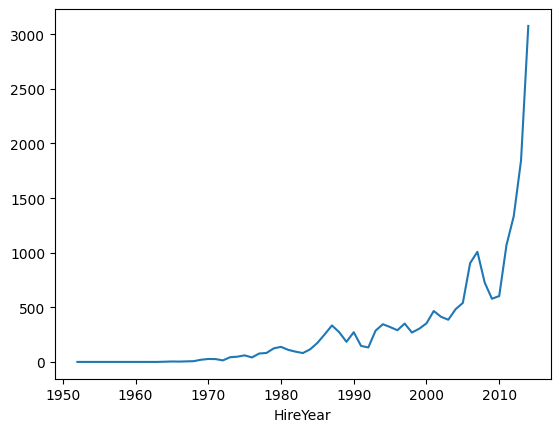

In [72]:
year_hiring['JobTitle'].plot(kind='line')

We can see the avarage salary is decreasing in recent years but the number of employment is exponentially increased.

Top 10 jobs that fetch highest salary

<Axes: xlabel='JobTitle'>

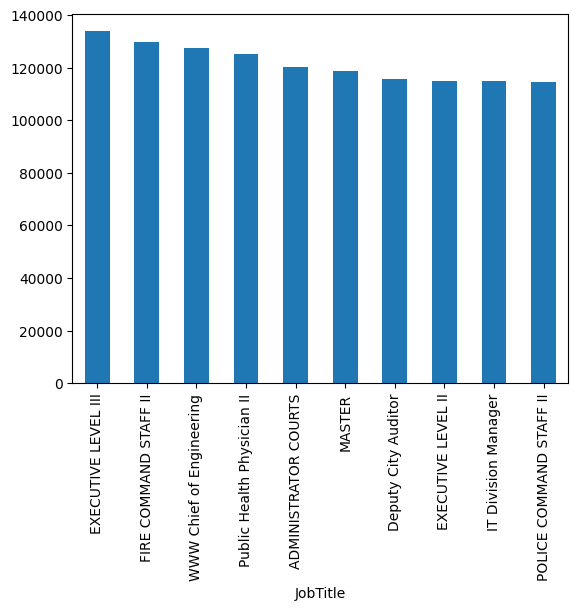

In [74]:

salary.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending=False).head(10).plot.bar()

The jobs whose average pay is more than total avaerage salary of entire data

In [76]:
mean_job = salary.AnnualSalary.mean()

good_paying_jobs = salary.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()

good_paying_jobs[good_paying_jobs['AnnualSalary']> mean_job]['JobTitle'].count()

805

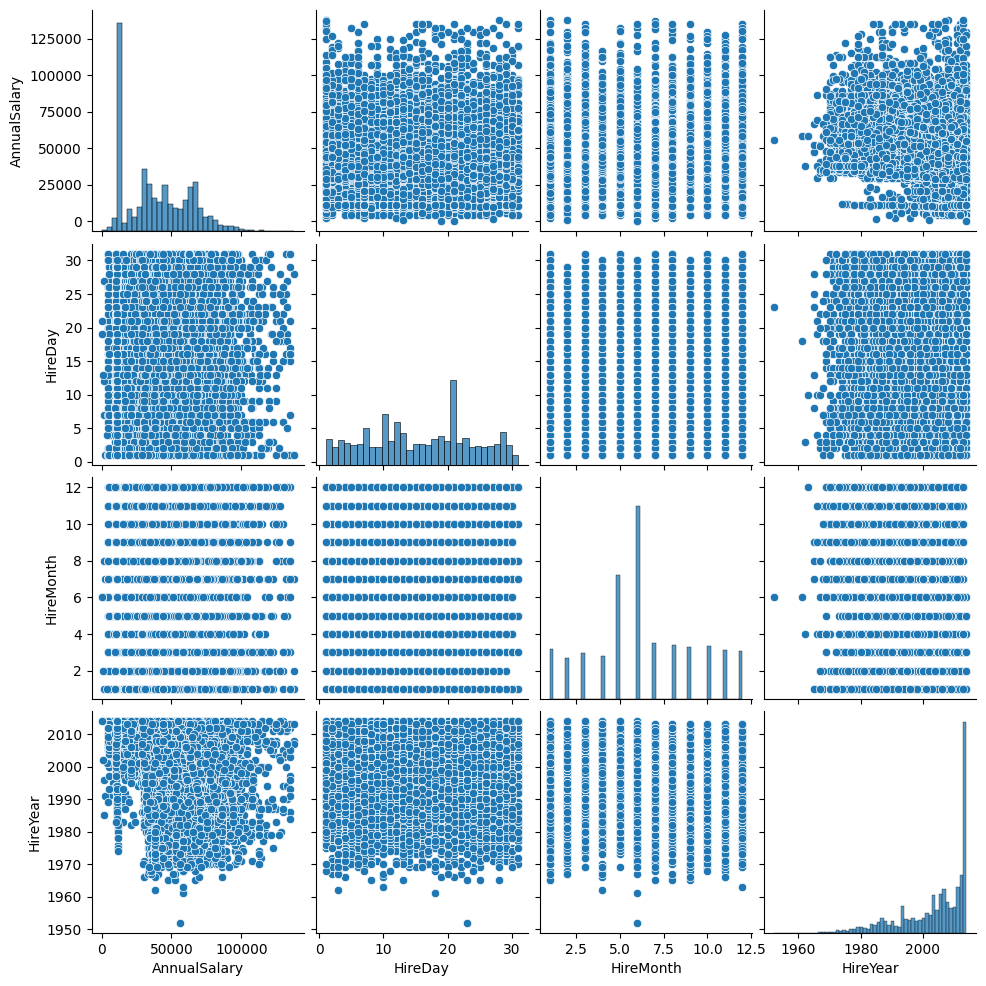

In [78]:
sns.pairplot(salary)

## Plot a heatmap


<Axes: >

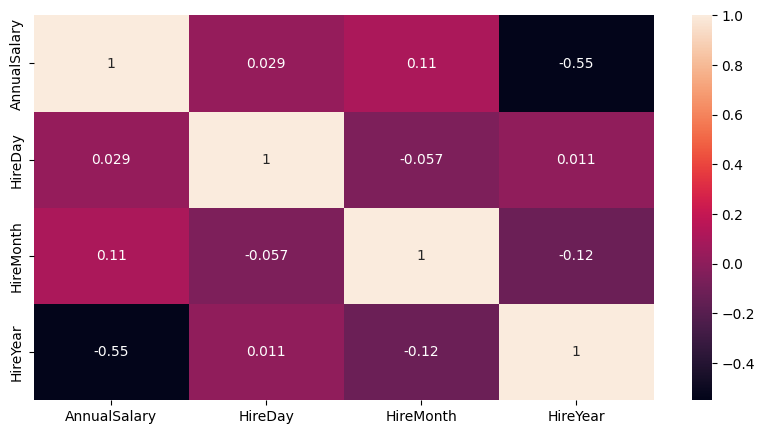

In [80]:
plt.figure(figsize=(10,5))
sns.heatmap(salary.corr(),annot=True)

Clearly hire year has a good correlation with annual salary.

Drop some columns which are not needed

In [82]:
salary = salary.drop(['HireDate',' Name'],axis=1)

## iii: Split

In [85]:
features=[str(x) for x in salary.columns if x!='AnnualSalary']

In [86]:
features

['JobTitle', 'AgencyID', 'Agency', 'HireDay', 'HireMonth', 'HireYear']

In [87]:
target='AnnualSalary'

But here we don't have JobTitle and AgencyID as numbers. We cannot use OneHotEncoder here as it will create a lot of variables. So we will go for mean encoding.

In [89]:
mean_agency = salary.groupby(['Agency'])['AnnualSalary'].mean()
salary['Agency'] = salary['Agency'].map(mean_agency)

mean_agencyid = salary.groupby(['AgencyID'])['AnnualSalary'].mean()
salary['AgencyID'] = salary['AgencyID'].map(mean_agencyid)

In [90]:
salary.head()

,JobTitle,AgencyID,Agency,AnnualSalary,HireDay,HireMonth,HireYear
0,AIDE BLUE CHIP,11310.000000,11310.270645,11310.0,10,6,2013
1,Facilities/Office Services II,46667.000000,51495.424242,53428.0,24,10,1979
2,ASSISTANT STATE'S ATTORNEY,65926.133333,64874.560224,68300.0,25,9,2006
3,EPIDEMIOLOGIST,48071.851064,39980.900360,62000.0,23,7,2009
4,POLICE OFFICER TRAINEE,44012.307229,61481.005417,43999.0,24,7,2013


In [91]:
mean_job = salary.groupby(['JobTitle'])['AnnualSalary'].mean()
salary['JobTitle'] = salary['JobTitle'].map(mean_job)

In [92]:
salary.head()

,JobTitle,AgencyID,Agency,AnnualSalary,HireDay,HireMonth,HireYear
0,11313.967200,11310.000000,11310.270645,11310.0,10,6,2013
1,47443.500000,46667.000000,51495.424242,53428.0,24,10,1979
2,69750.666667,65926.133333,64874.560224,68300.0,25,9,2006
3,57940.000000,48071.851064,39980.900360,62000.0,23,7,2009
4,44531.160494,44012.307229,61481.005417,43999.0,24,7,2013


Split into test train data

In [93]:
train, test = train_test_split(salary,train_size=0.7,random_state=42)

In [94]:
X_train=train[features]
y_train=train[target]

In [95]:
X_test=test[features]
y_test=test[target]

In [96]:
X_train.head()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
18622,43754.571429,43016.533333,45763.305913,7,6,1976
5492,70433.333333,50340.333333,39980.900360,19,11,2007
16442,11313.967200,11310.000000,11310.270645,7,6,2011
13389,53877.816514,48012.666667,48091.363636,19,1,2013
13662,11313.967200,11310.000000,11310.270645,21,5,2014


We can see that some features are having very large range and some very low. This may have impact on our model so we need to scale them.

In [98]:
## scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

In [99]:
X_train.head()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
18622,0.179941,0.163718,0.305183,-1.048427,-0.119142,-2.696492
5492,1.280677,0.493682,0.028578,0.388288,1.580187,0.275868
16442,-1.158523,-1.264777,-1.342899,-1.048427,-0.119142,0.659399
13389,0.597615,0.388812,0.416547,0.388288,-1.818471,0.851164
13662,-1.158523,-1.264777,-1.342899,0.627741,-0.459008,0.947046


In [100]:
X_test[X_test.columns] = scaler.fit_transform(X_test[X_test.columns])

# 2: Build Model
## iv: Baseline
Baseline is the most naive model we can have. It will predict the mean value for each output.

In [101]:
y_base=[y_train.mean()]*len(y_train)

In [103]:
base_mae=mean_absolute_error(y_base,y_train)

In [104]:
print(f"The MAE for baseline model is {base_mae}")

The MAE for baseline model is 20873.41038361679


## Iterate-Build Linear Regression Model

In [106]:
model=LinearRegression()

In [107]:
model.fit(X_train,y_train)

LinearRegression()

We have trained our model. Let's compare it Baseline

In [108]:
y_train_pred=model.predict(X_train)

In [114]:
train_mae=mean_absolute_error(y_train_pred,y_train)
print(f"The MAE for Linear Regression model is {train_mae}")

The MAE for Linear Regression model is 2521.011263047689


We can see the MAE is reduced significantally. But How good is the model-Check by R2 score.

In [112]:
model.score(X_train,y_train)

0.9652988325602798

In [113]:
model.score(X_test,y_test)

0.9668629183750328

### Model equation

In [116]:
equation = str(model.intercept_)
for i in range(len(model.coef_)):
    equation = equation + ' + ' +(str(model.coef_[i])) +' * ' + (str(X_train.columns[i]))
equation

'39414.16336182767 + 22146.819151247593 * JobTitle + 2934.133849081856 * AgencyID + -1838.222191116193 * Agency + -22.265261777263177 * HireDay + -65.02943690169275 * HireMonth + -2111.2514255686883 * HireYear'

<Axes: >

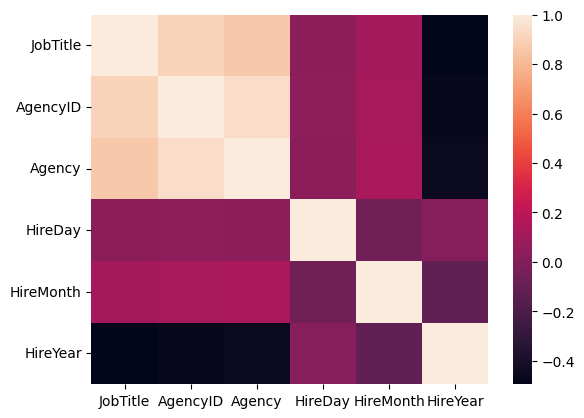

In [118]:
sns.heatmap(X_train.corr())

We have made a mistake by including all the three- JobTitle, AgencyID and Agency. They have correlation between them so we should have included only one the three.

# Conclusion:
1. There is more hiring in the month of May and June, but the mean salary of the employees hired on those months are lesser than the others.

2. The avarage salary is decreasing in recent years but the number of employment is exponentially increased.

3. Since the R2 score is good (0.96) for the test data, we can safely say this model is predicting the salary quite well.